# Predict Housing Price:

### 1. Import Libraries:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the Data:

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# get some descriptive statistics
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# get the count for every category
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### 3. Dealing with missing data:

In [6]:
data.isna().sum()/data.shape[0]

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

the rows with missing values only a 1% of our data, so we will drop them.

In [7]:
# Drop rows with missing values
data.dropna(inplace=True)

In [8]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### 4. Feature Selection:

In [9]:
num_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

In [10]:
corr_matrix = data[num_cols].corr()

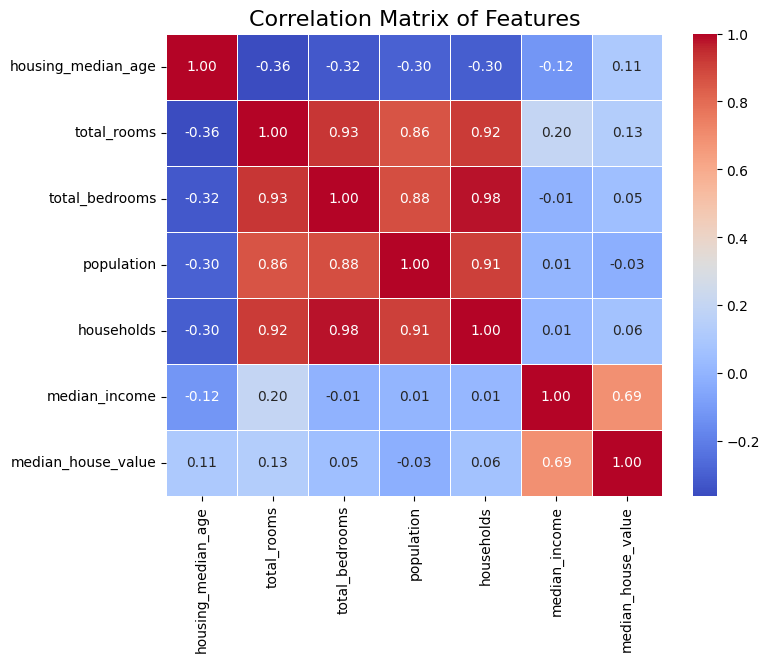

In [11]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Matrix of Features", fontsize=16)
plt.show()

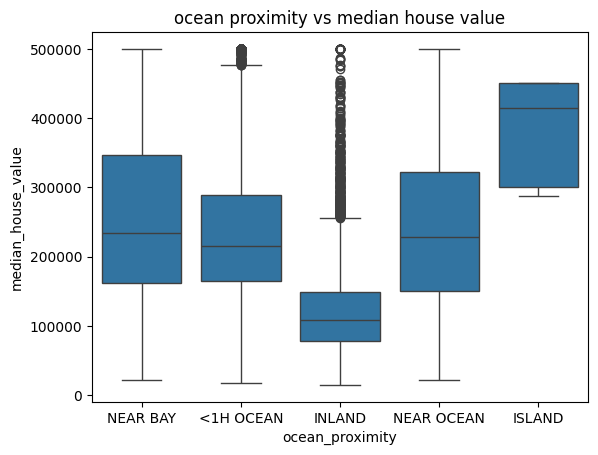

In [12]:
sns.boxplot(data, x='ocean_proximity', y='median_house_value')
plt.title('ocean proximity vs median house value')
plt.show()

I will use all the features to see how Lasso and Ridge will help us for feature selection.

In [30]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [31]:
selected_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                     'population', 'households', 'median_income', 'ocean_proximity']

X = data[selected_features]
y = data['median_house_value']

In [14]:
X = pd.get_dummies(X).astype(float)

In [15]:
X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0


### 5. Split the dataset into training and testing sets:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 6. Linear Regression:

#### 6.1 Train:

In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

#### 6.2 Predictions and evaluation:

In [19]:
linear_predictions_train = linear_model.predict(X_train)
linear_predictions_test = linear_model.predict(X_test)

linear_mse_train = mean_squared_error(y_train, linear_predictions_train)
linear_r2_train = r2_score(y_train, linear_predictions_train)

linear_mse_test = mean_squared_error(y_test, linear_predictions_test)
linear_r2_test = r2_score(y_test, linear_predictions_test)

print(f"Training Root Mean Squared Error: {np.sqrt(linear_mse_train)}")
print(f"Training R2 score: {linear_r2_train}")

print(f"Testing Root Mean Squared Error: {np.sqrt(linear_mse_test)}")
print(f"Testing R2 score: {linear_r2_test}")

Training Root Mean Squared Error: 69672.65400279018
Training R2 score: 0.633276173215183
Testing Root Mean Squared Error: 70322.00943952361
Testing R2 score: 0.6383824763283945


### 7. Lasso Regularization:

#### 7.1 Train:

In [20]:
lasso_model = Lasso(alpha=100, random_state=42)
lasso_model.fit(X_train, y_train)

Lasso(alpha=100, random_state=42)

#### 7.2 Predictions and evaluation:

In [21]:
lasso_predictions_train = lasso_model.predict(X_train)
lasso_predictions_test = lasso_model.predict(X_test)

lasso_mse_train = mean_squared_error(y_train, lasso_predictions_train)
lasso_r2_train = r2_score(y_train, lasso_predictions_train)

lasso_mse_test = mean_squared_error(y_test, lasso_predictions_test)
lasso_r2_test = r2_score(y_test, lasso_predictions_test)

print(f"Training Root Mean Squared Error: {np.sqrt(lasso_mse_train)}")
print(f"Training R2 score: {lasso_r2_train}")

print(f"Testing Root Mean Squared Error: {np.sqrt(lasso_mse_test)}")
print(f"Testing R2 score: {lasso_r2_test}")

Training Root Mean Squared Error: 69677.1610552152
Training R2 score: 0.6332287257051992
Testing Root Mean Squared Error: 70345.60581789605
Testing R2 score: 0.6381397558608342


### 8. Ridge Regularization:

#### 8.1 Train:

In [22]:
ridge_model = Ridge(alpha=100, random_state=42)
ridge_model.fit(X_train, y_train)

Ridge(alpha=100, random_state=42)

#### 8.2 Predictions and evaluation:

In [23]:
ridge_predictions_train = ridge_model.predict(X_train)
ridge_predictions_test = ridge_model.predict(X_test)

ridge_mse_train = mean_squared_error(y_train, ridge_predictions_train)
ridge_r2_train = r2_score(y_train, ridge_predictions_train)

ridge_mse_test = mean_squared_error(y_test, ridge_predictions_test)
ridge_r2_test = r2_score(y_test, ridge_predictions_test)

print(f"Training Root Mean Squared Error: {np.sqrt(ridge_mse_train)}")
print(f"Training R2 score: {ridge_r2_train}")

print(f"Testing Root Mean Squared Error: {np.sqrt(ridge_mse_test)}")
print(f"Testing R2 score: {ridge_r2_test}")

Training Root Mean Squared Error: 69687.06491862307
Training R2 score: 0.6331244530653648
Testing Root Mean Squared Error: 70376.73267273033
Testing R2 score: 0.6378194497624601


In [24]:
# Coefficients Visualization
features = X.columns
coefficients = pd.DataFrame({
    'Feature': features,
    'Linear': linear_model.coef_,
    'Lasso': lasso_model.coef_,
    'Ridge': ridge_model.coef_
})

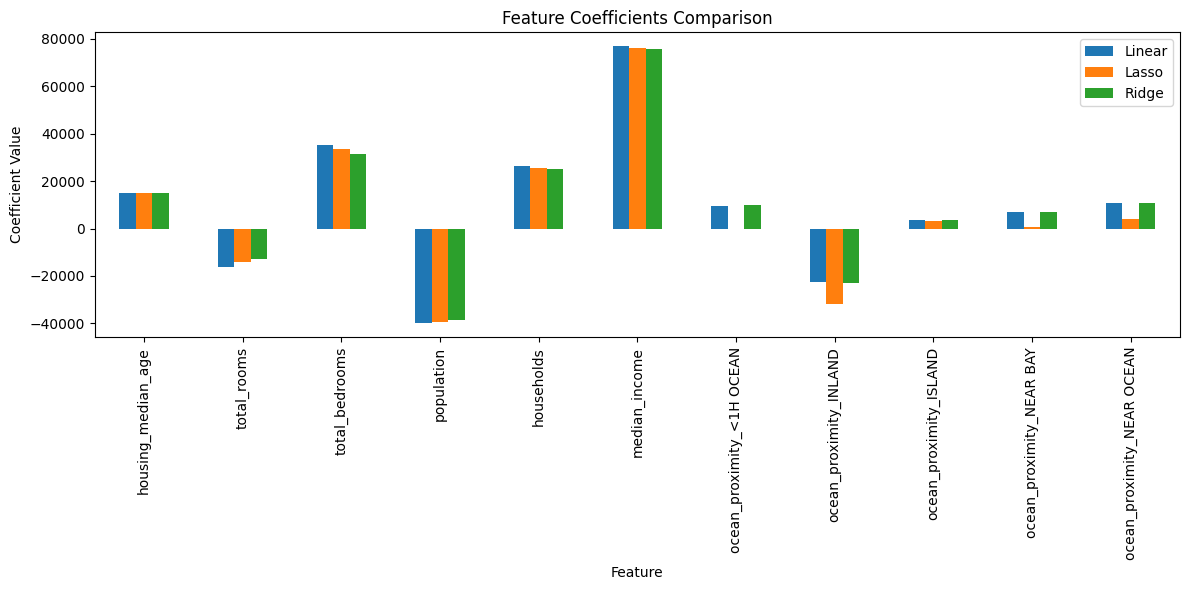

In [25]:
# Plot coefficients
coefficients.set_index('Feature').plot(kind='bar', figsize=(12, 6))
plt.title('Feature Coefficients Comparison')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

In [26]:
# Performance Comparison Visualization
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso', 'Ridge'],
    'MSE': [linear_mse_test, lasso_mse_test, ridge_mse_test],
    'R-squared': [linear_r2_test, lasso_r2_test, ridge_r2_test]
})

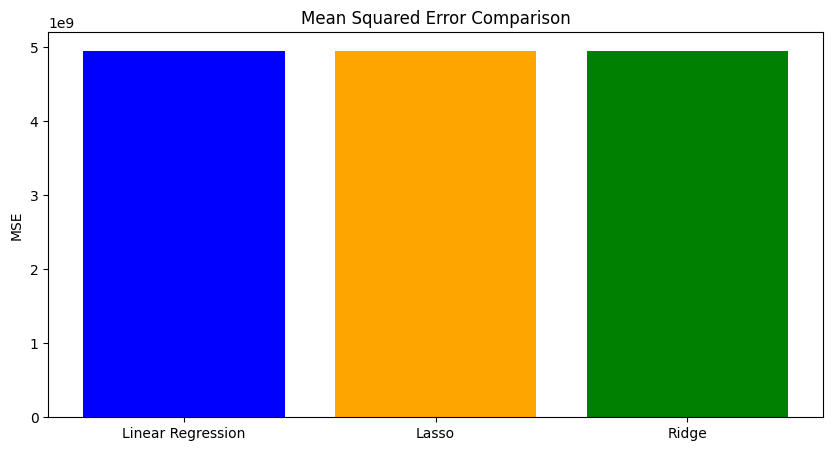

In [27]:
# Plot MSE
plt.figure(figsize=(10, 5))
plt.bar(metrics['Model'], metrics['MSE'], color=['blue', 'orange', 'green'])
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE')
plt.show()


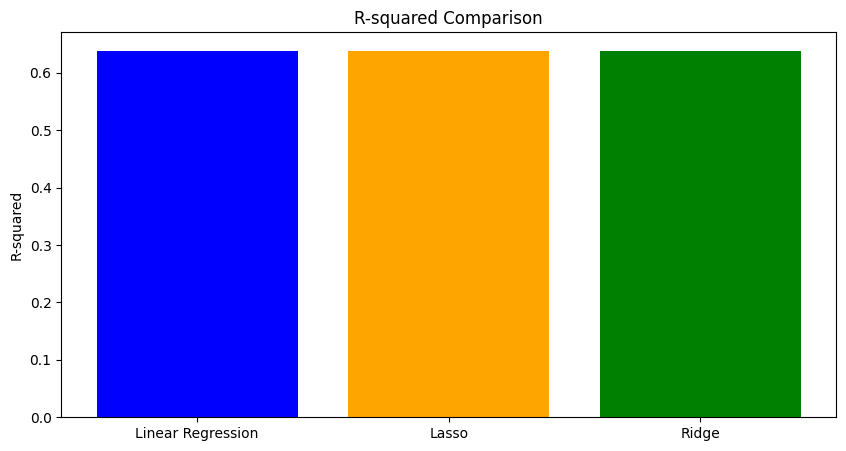

In [28]:
plt.figure(figsize=(10, 5))
plt.bar(metrics['Model'], metrics['R-squared'], color=['blue', 'orange', 'green'])
plt.title('R-squared Comparison')
plt.ylabel('R-squared')
plt.show()

In [29]:
print(metrics)

               Model           MSE  R-squared
0  Linear Regression  4.945185e+09   0.638382
1              Lasso  4.948504e+09   0.638140
2              Ridge  4.952885e+09   0.637819
